<a href="https://colab.research.google.com/github/Piyush-004/Research-Paper-Recommendation-System/blob/main/ResearchPaperRecommendationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ith aan nammada requirements

from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

from sklearn.model_selection import train_test_split

from ast import literal_eval


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [17]:
arxiv_data = pd.read_csv("arxiv_data_210930-054931.csv")

# Recommender System

In [3]:
arxiv_data.drop(columns = ["terms","abstracts"], inplace = True)

In [4]:
arxiv_data.drop_duplicates(inplace= True)
arxiv_data.reset_index(drop= True,inplace = True)

In [5]:
pd.set_option('display.max_colwidth', None)
arxiv_data

,titles
0,Multi-Level Attention Pooling for Graph Neural Networks: Unifying Graph Representations with Multiple Localities
1,Decision Forests vs. Deep Networks: Conceptual Similarities and Empirical Differences at Small Sample Sizes
2,Power up! Robust Graph Convolutional Network via Graph Powering
3,Releasing Graph Neural Networks with Differential Privacy Guarantees
4,Recurrence-Aware Long-Term Cognitive Network for Explainable Pattern Classification
...,...
41100,An experimental study of graph-based semi-supervised classification with additional node information
41101,Bayesian Differential Privacy through Posterior Sampling
41102,Mining Spatio-temporal Data on Industrialization from Historical Registries
41103,Wav2Letter: an End-to-End ConvNet-based Speech Recognition System


In [6]:
!pip install -U -q sentence-transformers

In [7]:

from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-MiniLM-L6-v2')

sentences = arxiv_data['titles']

embeddings = model.encode(sentences)



c:\Users\myazi\anaconda3\envs\TestingArea\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\myazi\anaconda3\envs\TestingArea\lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\myazi\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrat

In [8]:
embeddings

array([[ 0.06643406, -0.04954603,  0.06388083, ...,  0.00106309,
        -0.12156384, -0.06962774],
       [ 0.09212256, -0.07606938,  0.06572868, ..., -0.08565164,
        -0.09266549,  0.00725293],
       [-0.08162683,  0.02428931,  0.0188875 , ...,  0.00806162,
        -0.0512953 , -0.05873996],
       ...,
       [ 0.01227978, -0.08568832, -0.02782774, ..., -0.05257976,
        -0.1080668 ,  0.07843316],
       [-0.07258198, -0.12690923, -0.00535554, ...,  0.03597708,
        -0.03986151, -0.05971026],
       [ 0.00768867, -0.10124183,  0.08909857, ..., -0.08199865,
        -0.05649744,  0.09007058]], dtype=float32)

In [ ]:
c = 0

for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding length:", len(embedding)) 
    print("")
    
    if c >=5:
        break
    c +=1

Sentence: Multi-Level Attention Pooling for Graph Neural Networks: Unifying Graph Representations with Multiple Localities
Embedding length: 384

Sentence: Decision Forests vs. Deep Networks: Conceptual Similarities and Empirical Differences at Small Sample Sizes
Embedding length: 384

Sentence: Power up! Robust Graph Convolutional Network via Graph Powering
Embedding length: 384

Sentence: Releasing Graph Neural Networks with Differential Privacy Guarantees
Embedding length: 384

Sentence: Recurrence-Aware Long-Term Cognitive Network for Explainable Pattern Classification
Embedding length: 384

Sentence: Lifelong Graph Learning
Embedding length: 384



In [ ]:
import pickle

with open('embeddings.pkl', 'wb') as f:
    pickle.dump(embeddings, f)

with open('sentences.pkl', 'wb') as f:
    pickle.dump(sentences, f)

with open('rec_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:

embeddings = pickle.load(open('embeddings.pkl','rb'))
sentences = pickle.load(open('sentences.pkl','rb'))
rec_model = pickle.load(open('rec_model.pkl','rb'))

In [ ]:
import torch

def recommendation(input_paper):
    
    cosine_scores = util.cos_sim(embeddings, rec_model.encode(input_paper))

    
    top_similar_papers = torch.topk(cosine_scores, dim=0, k=5, sorted=True)

    
    papers_list = []
    for i in top_similar_papers.indices:
        papers_list.append(sentences[i.item()])

    return papers_list

In [13]:
# example usage 1: (use this paper as input (Attention is All you Need))
input_paper = input("Enter the title of any paper you like")
recommend_papers = recommendation(input_paper)


print("We recommend to read this paper............")
print("=============================================")
for paper in recommend_papers:
    print(paper)

We recommend to read this paper............
Attention that does not Explain Away
Area Attention
Pay Attention when Required
Long Short-Term Attention
Attention as Activation


In [ ]:
#(BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding))
input_paper = input("Enter the title of any paper you like")
recommend_papers = recommendation(input_paper)


print("We recommend to read this paper............")
print("=============================================")
for paper in recommend_papers:
    print(paper)

Enter the title of any paper you likeBERT
We recommend to read this paper............
Visualizing and Measuring the Geometry of BERT
On the Stability of Fine-tuning BERT: Misconceptions, Explanations, and Strong Baselines
The Lottery Ticket Hypothesis for Pre-trained BERT Networks
Telling BERT's full story: from Local Attention to Global Aggregation
VD-BERT: A Unified Vision and Dialog Transformer with BERT


In [ ]:
#(Review of deep learning: concepts, CNN architectures, challenges, applications, future directions))
input_paper = input("Enter the title of any paper you like")
recommend_papers = recommendation(input_paper)


print("We recommend to read this paper............")
print("=============================================")
for paper in recommend_papers:
    print(paper)

Enter the title of any paper you likeCNN
We recommend to read this paper............
Fast R-CNN
CNN-generated images are surprisingly easy to spot... for now
Mask R-CNN
Grid R-CNN
R-CNN minus R


#Subject Area Prediction Function

In [ ]:
from ast import literal_eval



arxiv_data["terms"] = arxiv_data['terms'].apply(literal_eval)


arxiv_data = arxiv_data[~arxiv_data['titles'].duplicated()]


arxiv_data['terms_str'] = arxiv_data['terms'].apply(str)


arxiv_data_filtered = arxiv_data.groupby('terms_str').filter(lambda x: len(x) > 1)


arxiv_data_filtered['terms'] = arxiv_data_filtered['terms_str'].apply(literal_eval)
arxiv_data_filtered.drop(columns=['terms_str'], inplace=True)

#train test 

train_df, test_df = train_test_split(arxiv_data_filtered, test_size=0.1, stratify=arxiv_data_filtered["terms"].values)


val_df = test_df.sample(frac=0.5, random_state=42)
test_df = test_df.drop(val_df.index)

#ith naala paranj thara
terms = tf.ragged.constant(train_df['terms'].values)
lookup = tf.keras.layers.StringLookup(output_mode='multi_hot')
lookup.adapt(terms)
vocab = lookup.get_vocabulary()

#vocab size print cheya
vocabulary_size = len(vocab)
print(f"Vocabulary size: {vocabulary_size}")

#vocab binary aaka
sample_label = train_df["terms"].iloc[0]
print(f"Original label: {sample_label}")
label_binarized = lookup([sample_label])
print(f"Label-binarized representation: {label_binarized}")


def make_dataset(dataframe, is_train=True):
    labels = tf.ragged.constant(dataframe["terms"].values)
    label_binarized = lookup(labels).numpy()  #Indaakiya func. Used to make a dataset for train test val
    dataset = tf.data.Dataset.from_tensor_slices((dataframe["abstracts"].values, label_binarized))
    dataset = dataset.shuffle(1280) if is_train else dataset
    return dataset.batch(128)


train_dataset = make_dataset(train_df, is_train=True)
validation_dataset = make_dataset(val_df, is_train=False) #dataset indaaki kazhinj
test_dataset = make_dataset(test_df, is_train=False)


def invert_multi_hot(encoded_labels):
    """Reverse a multi-hot encoding to a list of strings."""
    decoded_labels = []
    for index in np.where(encoded_labels == 1)[0]:
        decoded_labels.append(vocab[index])
    return decoded_labels


text_batch, label_batch = next(iter(train_dataset))
for i, text in enumerate(text_batch[:5]):
    label = label_batch[i].numpy()[None, ...]
    print(f"Abstract: {text}")
    print(f"Label(s): {invert_multi_hot(label[0])}")
    print(" ")


vocabulary = set()
arxiv_data["abstracts"].str.lower().str.split().apply(vocabulary.update)
vocabulary_size = len(vocabulary)
print(f"Abstract vocabulary size: {vocabulary_size}")


if vocabulary_size < 158812:
    for i in range(158812 - vocabulary_size):
        vocabulary.add(f"dummyword{i}")
elif vocabulary_size > 158812:
    vocabulary = list(vocabulary)[:158812]

vocabulary_size = len(vocabulary)
print(f"Adjusted vocabulary size: {vocabulary_size}")




Vocabulary size: 165
Original label: ['cs.CV']
Label-binarized representation: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Abstract: b'Graph neural networks (GNNs) have emerged as a powerful approach for solving\nmany network mining tasks. However, learning on large graphs remains a\nchallenge - many recently proposed scalable GNN approaches rely on an expensive\nmessage-passing procedure to propagate information through the graph. We\npresent the PPRGo model which utilizes an efficient approximation of\ninformation diffusion

In [19]:

text_vectorizer = layers.TextVectorization(max_tokens=vocabulary_size,ngrams=2,output_mode="tf_idf")

text_vectorizer.adapt(train_dataset.map(lambda text, label: text))

In [20]:
train_dataset = train_dataset.map(lambda text, label: (text_vectorizer(text), label), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
validation_dataset = validation_dataset.map(lambda text, label: (text_vectorizer(text), label), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.map(lambda text, label: (text_vectorizer(text), label), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)


In [21]:

from tensorflow.keras.callbacks import EarlyStopping


model1 = keras.Sequential([
    
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5), 

    
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),  

    
    layers.Dense(lookup.vocabulary_size(), activation='sigmoid')
])

# Compile the model
model1.compile(loss="binary_crossentropy", optimizer='adam', metrics=['binary_accuracy'])

# Add early stopping
# Number of epochs with no improvement after which training will be stopped.
# Restore weights from the epoch with the best value of the monitored quantity.
early_stopping = EarlyStopping(patience=5,restore_best_weights=True)

# Train the model
# Add early stopping callback.verbose=1
history = model1.fit(train_dataset,validation_data=validation_dataset,epochs=20,callbacks=[early_stopping])


Epoch 1/20

272/272 [==============================] - 146s 521ms/step - loss: 0.0480 - binary_accuracy: 0.9838 - val_loss: 0.0185 - val_binary_accuracy: 0.9946
Epoch 2/20
272/272 [==============================] - 130s 479ms/step - loss: 0.0174 - binary_accuracy: 0.9950 - val_loss: 0.0180 - val_binary_accuracy: 0.9947
Epoch 3/20
272/272 [==============================] - 127s 466ms/step - loss: 0.0134 - binary_accuracy: 0.9959 - val_loss: 0.0186 - val_binary_accuracy: 0.9946
Epoch 4/20
272/272 [==============================] - 122s 447ms/step - loss: 0.0110 - binary_accuracy: 0.9967 - val_loss: 0.0192 - val_binary_accuracy: 0.9946
Epoch 5/20
272/272 [==============================] - 122s 448ms/step - loss: 0.0094 - binary_accuracy: 0.9972 - val_loss: 0.0193 - val_binary_accuracy: 0.9946
Epoch 6/20
272/272 [==============================] - 117s 430ms/step - loss: 0.0082 - binary_accuracy: 0.9976 - val_loss: 0.0199 - val_binary_accuracy: 0.9946
Epoch 7/20
272/272 [==================

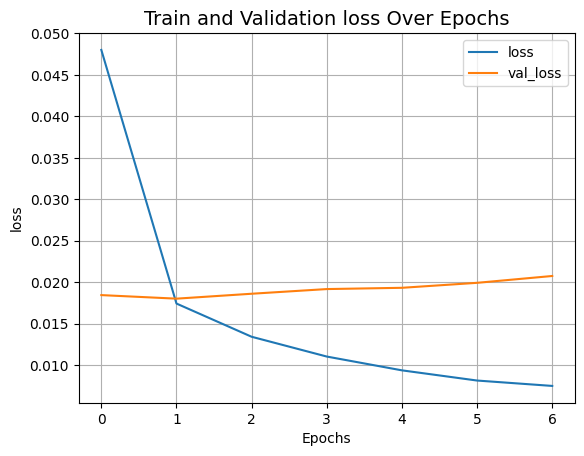

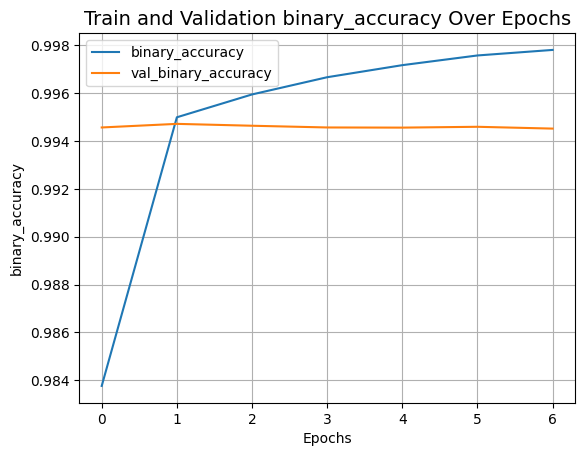

In [22]:

def plot_result(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


plot_result("loss")
plot_result("binary_accuracy")

In [23]:

_, binary_acc1 = model1.evaluate(test_dataset)
_, binary_acc2 = model1.evaluate(validation_dataset)

print(f"Categorical accuracy on the test set: {round(binary_acc1 * 100, 2)}%.")
print(f"Categorical accuracy on the validation set: {round(binary_acc2 * 100, 2)}%.")

16/16 [==============================] - 1s 65ms/step - loss: 0.0180 - binary_accuracy: 0.9947
Categorical accuracy on the test set: 99.47%.
Categorical accuracy on the validation set: 99.47%.


In [24]:
import pickle

model1.save("models/model.h5")


saved_text_vectorizer_config = text_vectorizer.get_config()
with open("models/text_vectorizer_config.pkl", "wb") as f:
    pickle.dump(saved_text_vectorizer_config, f)



with open("models/vocab.pkl", "wb") as f:
    pickle.dump(vocab, f)

c:\Users\myazi\anaconda3\envs\TestingArea\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
from tensorflow import keras
import pickle


loaded_model = keras.models.load_model("models/model.h5")

from tensorflow.keras.layers import TextVectorization


with open("models/text_vectorizer_config.pkl", "rb") as f:
    saved_text_vectorizer_config = pickle.load(f)


loaded_text_vectorizer = TextVectorization.from_config(saved_text_vectorizer_config)


with open("text_vectorizer_weights.pkl", "rb") as f:
    weights = pickle.load(f)
    loaded_text_vectorizer.set_weights(weights)

In [26]:

with open("models/vocab.pkl", "rb") as f:
    loaded_vocab = pickle.load(f)

In [27]:
def predict_category(abstract, model, vectorizer, label_lookup):
    
    preprocessed_abstract = vectorizer([abstract])

    
    predictions = model.predict(preprocessed_abstract)

    
    predicted_labels = label_lookup(np.round(predictions).astype(int)[0])

    return predicted_labels

In [28]:

new_abstract = "Graph neural networks (GNNs) have been widely used to learn vector\nrepresentation of graph-structured data and achieved better task performance\nthan conventional methods. The foundation of GNNs is the message passing\nprocedure, which propagates the information in a node to its neighbors. Since\nthis procedure proceeds one step per layer, the range of the information\npropagation among nodes is small in the lower layers, and it expands toward the\nhigher layers. Therefore, a GNN model has to be deep enough to capture global\nstructural information in a graph. On the other hand, it is known that deep GNN\nmodels suffer from performance degradation because they lose nodes' local\ninformation, which would be essential for good model performance, through many\nmessage passing steps. In this study, we propose multi-level attention pooling\n(MLAP) for graph-level classification tasks, which can adapt to both local and\nglobal structural information in a graph. It has an attention pooling layer for\neach message passing step and computes the final graph representation by\nunifying the layer-wise graph representations. The MLAP architecture allows\nmodels to utilize the structural information of graphs with multiple levels of\nlocalities because it preserves layer-wise information before losing them due\nto oversmoothing. Results of our experiments show that the MLAP architecture\nimproves the graph classification performance compared to the baseline\narchitectures. In addition, analyses on the layer-wise graph representations\nsuggest that aggregating information from multiple levels of localities indeed\nhas the potential to improve the discriminability of learned graph\nrepresentations."
predicted_categories = predict_category(new_abstract, loaded_model, loaded_text_vectorizer, invert_multi_hot)
print("Predicted Categories:", predicted_categories)

1/1 [==============================] - 0s 111ms/step
Predicted Categories: ['cs.CV', 'cs.LG']


In [29]:

new_abstract = 'Deep networks and decision forests (such as random forests and gradient\nboosted trees) are the leading machine learning methods for structured and\ntabular data, respectively. Many papers have empirically compared large numbers\nof classifiers on one or two different domains (e.g., on 100 different tabular\ndata settings). However, a careful conceptual and empirical comparison of these\ntwo strategies using the most contemporary best practices has yet to be\nperformed. Conceptually, we illustrate that both can be profitably viewed as\n"partition and vote" schemes. Specifically, the representation space that they\nboth learn is a partitioning of feature space into a union of convex polytopes.\nFor inference, each decides on the basis of votes from the activated nodes.\nThis formulation allows for a unified basic understanding of the relationship\nbetween these methods. Empirically, we compare these two strategies on hundreds\nof tabular data settings, as well as several vision and auditory settings. Our\nfocus is on datasets with at most 10,000 samples, which represent a large\nfraction of scientific and biomedical datasets. In general, we found forests to\nexcel at tabular and structured data (vision and audition) with small sample\nsizes, whereas deep nets performed better on structured data with larger sample\nsizes. This suggests that further gains in both scenarios may be realized via\nfurther combining aspects of forests and networks. We will continue revising\nthis technical report in the coming months with updated results.'
predicted_categories = predict_category(new_abstract, loaded_model, loaded_text_vectorizer, invert_multi_hot)
print("Predicted Categories:", predicted_categories)

1/1 [==============================] - 0s 27ms/step
Predicted Categories: ['cs.LG']


In [30]:

new_abstract = 'ML'
predicted_categories = predict_category(new_abstract, loaded_model, loaded_text_vectorizer, invert_multi_hot)
print("Predicted Categories:", predicted_categories)

1/1 [==============================] - 0s 28ms/step
Predicted Categories: ['cs.CV', 'cs.LG']
